In [1]:
#Linear algebra operations
import numpy as np
from scipy import linalg
#determinant
arr = np.array([[1, 2],
                [3, 4]])
print('determinant =',linalg.det(arr))
#inverse
print('inverse:\n',linalg.inv(arr))

determinant = -2.0
inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]


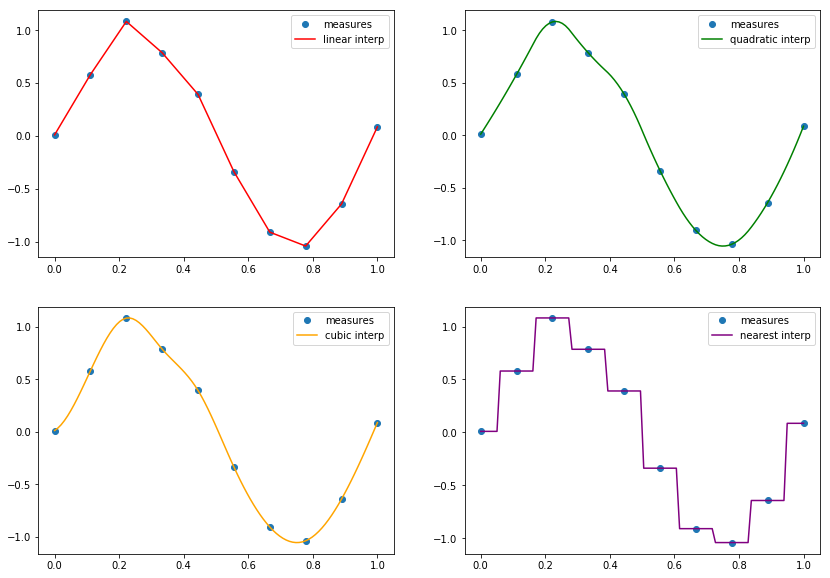

In [19]:
#Interpolation (create fuction from measured data)
import matplotlib.pyplot as plt
import numpy as np
#create random measurement
measured_time = np.linspace(0,1,10)
noise = (np.random.random(10)*2-1)*0.1
measures = np.sin(2*np.pi*measured_time) + noise

from scipy.interpolate import interp1d
interpolation_time = np.linspace(0, 1, 100)

#linear interp
linear_interp = interp1d(measured_time,measures) #interp1d build linear interpolation function
linear_results = linear_interp(interpolation_time) #using function to test
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
plt.plot(measured_time,measures,'o',label='measures')
plt.plot(interpolation_time,linear_results,color='red',label='linear interp')
plt.legend()

#using quadratic interp
quad_interp = interp1d(measured_time,measures,kind ='quadratic')
quad_results = quad_interp(interpolation_time)
plt.subplot(2,2,2)
plt.plot(measured_time,measures,'o',label='measures')
plt.plot(interpolation_time,quad_results,color='green',label='quadratic interp')
plt.legend()

#using cubic interp
cubic_interp = interp1d(measured_time,measures,kind ='cubic')
cubic_results = cubic_interp(interpolation_time)
plt.subplot(2,2,3)
plt.plot(measured_time,measures,'o',label='measures')
plt.plot(interpolation_time,cubic_results,color='orange',label='cubic interp')
plt.legend()

#using nearest interp
near_interp = interp1d(measured_time,measures,kind ='nearest')
near_results = near_interp(interpolation_time)
plt.subplot(2,2,4)
plt.plot(measured_time,measures,'o',label='measures')
plt.plot(interpolation_time,near_results,color='purple',label='nearest interp')
plt.legend()

plt.show()

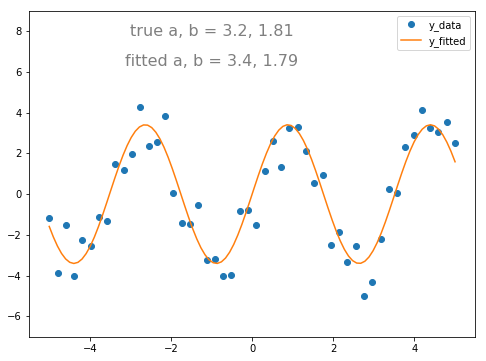

In [18]:
#Optimize + curve fitting
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#Manufacture raw data
x_data = np.linspace(-5, 5, num=50)
rand_a = (5-2)*np.random.ranf()+2 #from 2 to 5
rand_b = (3-1)*np.random.ranf()+1 #from 1 to 3
y_data =  rand_a * np.sin(rand_b * x_data) + np.random.normal(size=50) #randomize sine function
#create test function with parameters a and b to fit to data
def f(x,a,b):
    return a*np.sin(b*x)
#using optimize curve_fit to find para a and b from function f
params, params_covariance = optimize.curve_fit(f, x_data, y_data, p0=[3, 2]) #p0 is initial guess
#Compare results
x_data_more = np.linspace(-5, 5, num=100)
y_fitted = f(x_data_more,params[0],params[1])
plt.figure(figsize=(8,6))
plt.plot(x_data,y_data,'o',label='y_data')
plt.plot(x_data_more,y_fitted,'-',label='y_fitted')
plt.legend(loc='best')
plt.text(-1, 8, 'true a, b = {:.3}, {:.3}'.format(rand_a,rand_b), ha='center', va='center', size=16, alpha=.5)
plt.text(-1, 6.5, 'fitted a, b = {:.3}, {:.3}'.format(params[0],params[1]), ha='center', va='center', size=16, alpha=.5)
plt.ylim(-7, 9)
plt.show()
#NOT ALWAYS FITTED CORRECTLY, INITIAL GUESS IS IMPORTANT

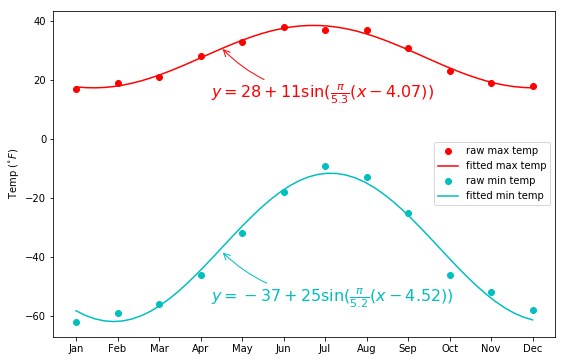

In [4]:
#Alaska temperature
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

temp_max = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
temp_min = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
months = np.arange(1,13)

#define some function
def f(x,a,b,c,d):
    return a+b*np.sin(np.pi/c*(x-d))
#use optimize cureve fit
params_max, params_covariance = optimize.curve_fit(f, months, temp_max, p0=[temp_max.min(),temp_max.ptp(),6,np.pi])
params_min, params_covariance = optimize.curve_fit(f, months, temp_min, p0=[temp_min.min(),temp_min.ptp(),6,np.pi])

months_more = np.linspace(1,12,50)
temp_max_fitted = f(months_more,*params_max)
temp_min_fitted = f(months_more,*params_min)
plt.figure(figsize=(9, 6))
plt.plot(months,temp_max,'o',color='r',label='raw max temp')
plt.plot(months_more,temp_max_fitted,'-',color='r',label='fitted max temp')
plt.plot(months,temp_min,'o',color='c',label='raw min temp')
plt.plot(months_more,temp_min_fitted,'-',color='c',label='fitted min temp')

#format graph
plt.legend(loc='best')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel(r'Temp ($^{\circ}F$)')
max_formula = r"$y = {0:.0f}+{1:.0f}\sin(\frac{{\pi}}{{{2:.1f}}}(x-{3:.2f}))$".format(*params_max)
plt.annotate(max_formula, xy=(4.5, 31),
             xytext=(-10, -50), textcoords='offset points', fontsize=16, color='r',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2", color='r'))
min_formula = r"$y = {0:.0f}+{1:.0f}\sin(\frac{{\pi}}{{{2:.1f}}}(x-{3:.2f}))$".format(*params_min)
plt.annotate(min_formula, xy=(4.5, -38),
             xytext=(-10, -50), textcoords='offset points', fontsize=16, color='c',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2", color='c'))
plt.show()

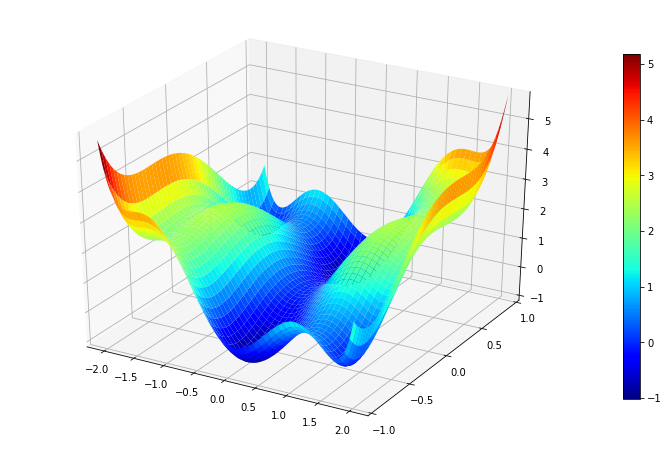

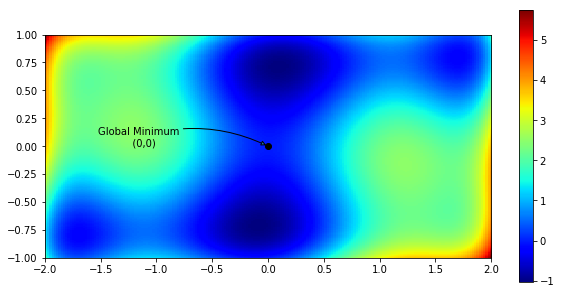

In [5]:
#2D minimization
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
def f(x):
    return (4-2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2
x = np.linspace(-2,2,200)
y = np.linspace(-1,1,200)
xv,yv = np.meshgrid(x,y)
#plot 3D surface
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
surf = ax.plot_surface(xv, yv, f([xv,yv]),cmap='jet')
fig.colorbar(surf, shrink = 0.8)
ax.set_ylim(-1,1)
ax.yaxis.set_major_locator(LinearLocator(5))
#plot flat
plt.figure(figsize=(10,5))
plt.imshow(f([xv,yv]),cmap='jet',extent=[-2, 2, -1, 1])
plt.colorbar()

#Find minimum
globmin = optimize.minimize(f, x0=[0,0]).x
plt.scatter(globmin[0],globmin[1],color='k')
plt.annotate("Global Minimum\n           ({:.0f},{:.0f})".format(globmin[0],globmin[1]),xy=globmin,
            xytext=(-170,0),textcoords='offset points',
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=-.2"))
plt.show()

Minima from x0=0: -1.31
Minima from x0=3: 3.84
Global minima: -1.31
Root at x0=1: 0.00
Root at x0=-2.5: -2.48


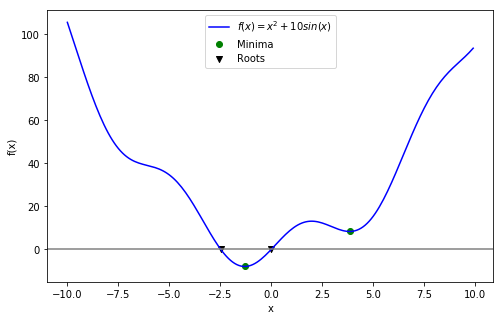

In [6]:
#Find minimum of function using optimize
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 10*np.sin(x)

#find minimum coor:
mini1 = optimize.minimize(f, x0=0, method='L-BFGS-B').x[0] #x0 is starting point, LBFGSB is a gradient descent based method
print('Minima from x0=0: {:.2f}'.format(mini1))
#since a local minima at ~3
mini2 = optimize.minimize(f, x0=3, method='L-BFGS-B').x[0]
print('Minima from x0=3: {:.2f}'.format(mini2))
#finding global minima:
print('Global minima: {:.2f}'.format(optimize.basinhopping(f,0).x[0]))

#find roots (f=0)
root = optimize.root(f, x0=1).x[0] #x0 is initial guess
print('Root at x0=1: {:.2f}'.format(root))
root2 = optimize.root(f, x0=-2.5).x[0]
print('Root at x0=-2.5: {:.2f}'.format(root2))

#plot:
plt.figure(figsize=(8,5))
x = np.arange(-10,10,0.1)
plt.plot(x, f(x),'b-',label=r'$f(x)=x^2 + 10sin(x)$')
plt.scatter([mini1,mini2], [f(mini1),f(mini2)],color='green',label='Minima')
plt.scatter([root,root2], [f(root),f(root2)],color='black',marker='v',label='Roots')
plt.axhline(0, color='gray')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

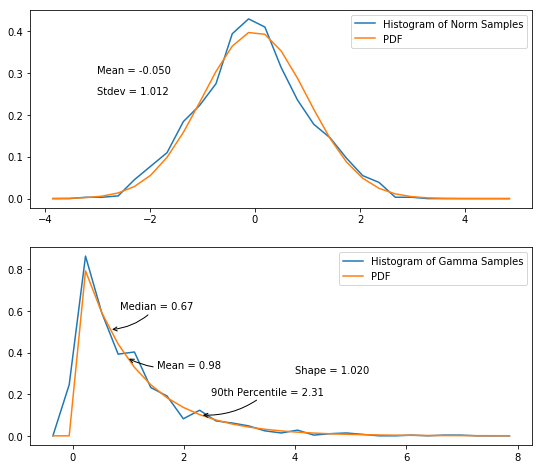

In [7]:
#Stats - histogram and probability density function
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

samples = np.random.normal(size=1000)
bins = np.linspace(-4, 5,30)

histogram = np.histogram(samples, bins=bins, normed=True)[0]

bins = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bins)  # norm is a distribution object

plt.figure(figsize=(9,8))
plt.subplot(2,1,1)
plt.plot(bins, histogram,label='Histogram of Norm Samples') 
plt.plot(bins, pdf,label='PDF')
plt.legend(loc=1)
#find mean, std of norm distribution by fitting
loc, std = stats.norm.fit(samples)
plt.annotate('Mean = {:.3f}'.format(loc), xy=(-3, 0.3))
plt.annotate('Stdev = {:.3f}'.format(std), xy=(-3, 0.25))

#Exercise with gamma distribution
samples2 = np.random.gamma(shape=1,size=1000)
bins2 = np.linspace(-0.5,8,30)
histogram2 = np.histogram(samples2, bins=bins2, normed=True)
bins2 = 0.5*(bins2[1:] + bins2[:-1])
pdf2 = stats.gamma.pdf(bins2,1)
plt.subplot(2,1,2)
plt.plot(bins2,histogram2[0],label='Histogram of Gamma Samples') 
plt.plot(bins2, pdf2,label='PDF')
plt.legend(loc=1)
#find mean, std of norm distribution by fitting
shape = stats.gamma.fit(samples2)
plt.annotate('Shape = {:.3f}'.format(shape[0]), xy=(4, 0.3))

#Find mean and median
mean = np.mean(samples2)
median = np.median(samples2)
percentile90 = stats.scoreatpercentile(samples2,90)
plt.annotate('Mean = {:.2f}'.format(mean), xy=(mean, stats.gamma.pdf(mean,1)),
             xytext=(30, -10), textcoords='offset points',             
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))
plt.annotate('Median = {:.2f}'.format(median), xy=(median, stats.gamma.pdf(median,1)),
             xytext=(10, 20), textcoords='offset points',             
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))
plt.annotate('90th Percentile = {:.2f}'.format(percentile90), xy=(percentile90, stats.gamma.pdf(percentile90,1)),
             xytext=(10, 20), textcoords='offset points',             
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))
plt.show()

In [8]:
#Numerical integration - function integrals using quad()
from scipy.integrate import quad
import numpy as np
res, err = quad(np.sin,0,np.pi/2) #sin(x) from 0 to pi/2
print(res,err)

0.9999999999999999 1.1102230246251564e-14


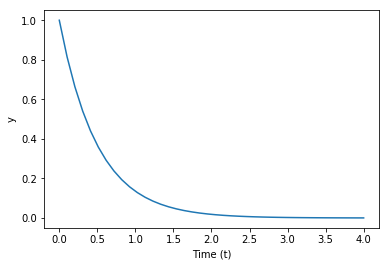

In [9]:
#integrating ODE
#Solve dy/dt = -2y between t 0->4; y(t=0) = 1
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def calc_derivative(ypos,time):
    return -2*ypos
time_vec = np.linspace(0,4,40)
y = odeint(calc_derivative,y0=1,t=time_vec)
plt.plot(time_vec,y)
plt.ylabel('y')
plt.xlabel('Time (t)')
plt.show()

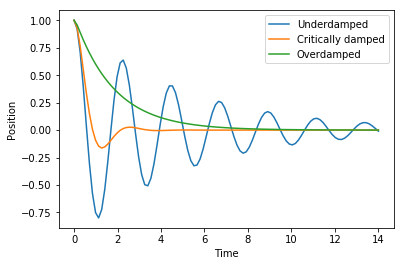

In [10]:
#Solve ODE of damped spring-mass oscillator
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
mass = 0.5 #kg
k = 4 #N/m - spring const
cviscous = np.array([0.4, 15]) #N.s/m - damping coef
omega = np.sqrt(k/mass)
eps = cviscous/(2*mass*omega)
#formula is y'' + 2*ep*omega*y' + omega^2 *y=0
def deriv(yvec,time,eps,omega):
    return (yvec[1],-eps*omega*yvec[1] - omega**2*yvec[0])
time_vec = np.linspace(0,14,100)
yinit = (1,0)
yarr = odeint(deriv, yinit, time_vec, args=(eps[0],omega))
yarr2 = odeint(deriv, yinit, time_vec, args=(1,omega))
yarr3 = odeint(deriv, yinit, time_vec, args=(eps[1],omega))
plt.plot(time_vec,yarr[:,0],label='Underdamped')
plt.plot(time_vec,yarr2[:,0],label='Critically damped')
plt.plot(time_vec,yarr3[:,0],label='Overdamped')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


C:\Users\c212125\Python\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


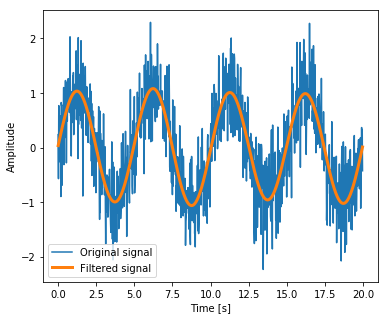

In [11]:
#Fast Fourier Transform used in signal processing
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
#Generate signal with rng
np.random.seed(1234)
time_step=0.02
period = 5.
time_vec = np.arange(0,20,time_step)
sig = (np.sin(2*np.pi/period*time_vec) + 0.5*np.random.randn(time_vec.size))

#FFT of the signal
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

#Find peak frequency
pos_mask = np.where(sample_freq>0) #only look at positive freg
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()] #freg at max power

#remove all high frequency - i.e clean up signal noise
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

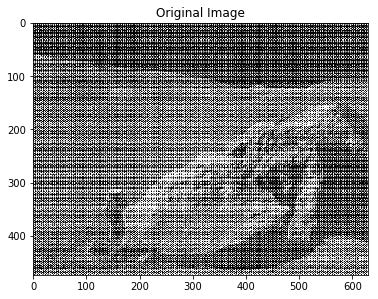

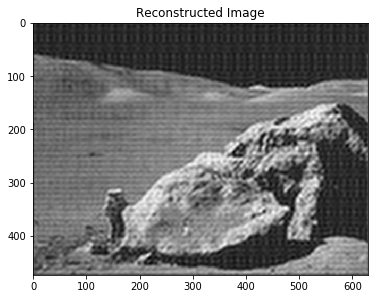

In [12]:
#Fast Fourier Transform used in image processing
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
moon = plt.imread('moonlanding.png')
plt.figure(figsize=(6,5))
plt.imshow(moon, 'gray')
plt.title('Original Image')

im_fft = fftpack.fft2(moon)
#In the lines following, we'll make a copy of the original spectrum and truncate coefficients.
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1
# Call ff a copy of the original transform. Numpy arrays have a copy method for this purpose.
im_fft2 = im_fft.copy()
# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape
# Set to zero all rows with indices between r*keep_fraction and r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
# Reconstruct the denoised image from the filtered spectrum, keep only the real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure(figsize=(6,5))
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
plt.show()

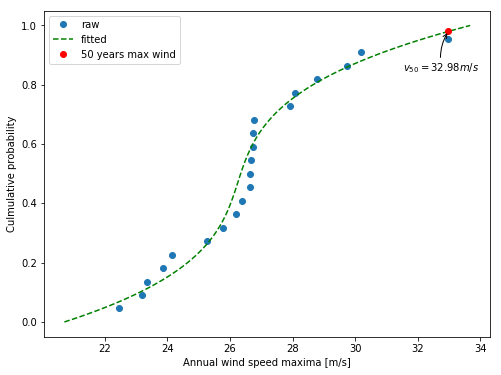

In [13]:
#Excercise: Maximum wind speed prediction at Sprogo station
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
#find culmulative probability
cprob = (np.arange(years_nb, dtype=np.float64) + 1)/(years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)

from scipy.interpolate import UnivariateSpline
quantile_func = UnivariateSpline(cprob, sorted_max_speeds)

#use quantile function
nprob = np.linspace(0,1,100)
fitted_max_speeds = quantile_func(nprob)
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)

#Plot
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(sorted_max_speeds,cprob,'o', label='raw')
plt.plot(fitted_max_speeds,nprob,'g--', label='fitted')
plt.plot(fifty_wind,fifty_prob,'ro', label='50 years max wind')
plt.legend(loc='best')
plt.xlabel('Annual wind speed maxima [m/s]')
plt.ylabel('Culmulative probability')
plt.annotate(r'$ v_{{50}} = {:.2f} m/s $'.format(fifty_wind), xy=(fifty_wind, fifty_prob),
             xytext=(-45, -40), textcoords='offset points',             
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))
plt.show()

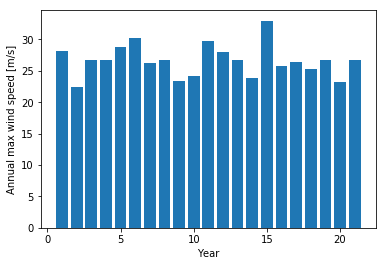

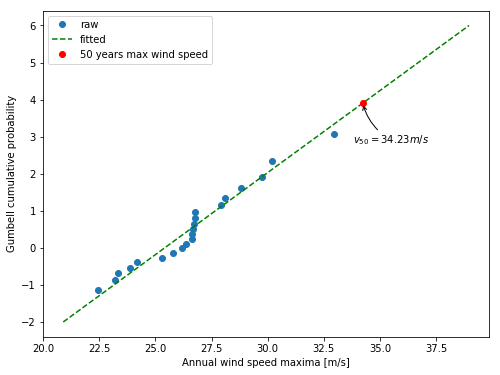

In [14]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

#Max wind speed using Gumbell distribution
windspeeds = np.load('sprog-windspeeds.npy')
wind_nb = windspeeds.shape[0]
annual_windspeeds = np.split(windspeeds[:-2],21)
max_windspeeds = [np.max(i) for i in annual_windspeeds]
plt.figure()
plt.bar(np.arange(21)+1,max_windspeeds)
plt.xlabel('Year')
plt.ylabel('Annual max wind speed [m/s]')
plt.show()
#Find Gumbell cumulative distribution:
cprob = (np.arange(21)+1)/22
gprob = -np.log(-np.log(cprob))

quantile_func = UnivariateSpline(gprob, np.sort(max_windspeeds),k=1)

#use quantile function
nprob = np.linspace(-2,6,100)
fitted_max_speeds = quantile_func(nprob)
fifty_prob = -np.log(-np.log(1. - 0.02))
fifty_wind = quantile_func(fifty_prob)

plt.figure(figsize=(8,6))
plt.plot(np.sort(max_windspeeds),gprob,'o',label='raw')
plt.plot(fitted_max_speeds, nprob,'g--',label='fitted')
plt.plot(fifty_wind,fifty_prob,'ro',label='50 years max wind speed')
plt.xlabel('Annual wind speed maxima [m/s]')
plt.ylabel('Gumbell cumulative probability')
plt.legend(loc='best')
plt.annotate(r'$ v_{{50}} = {:.2f} m/s $'.format(fifty_wind), xy=(fifty_wind, fifty_prob),
             xytext=(-10, -40), textcoords='offset points',             
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))
plt.show()

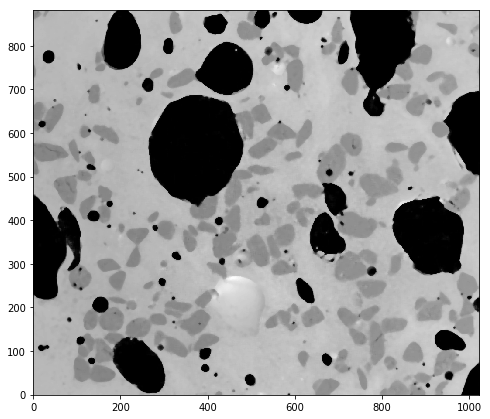

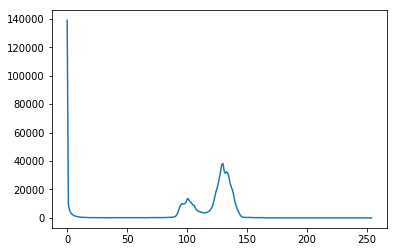

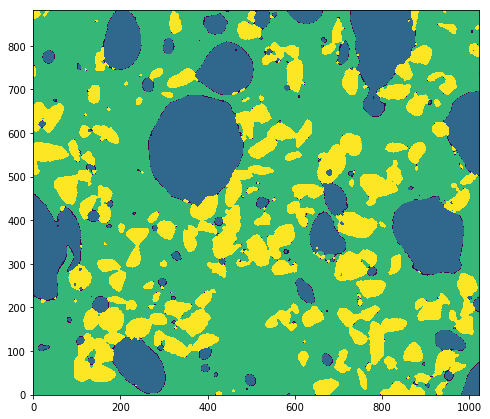

Number of bubbles = 37; Average bubbles size = 14488
Max bubbles size = 530911; Min bubbles size = 1


In [36]:
#SEM analysis
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from scipy import optimize
dat = plt.imread('MV_HFV_012.jpg')
#remove info panel:
dat = dat[:-60]
filtdat = ndimage.median_filter(dat,size=(8,8))
plt.figure(figsize=(8,8))
plt.imshow(filtdat,'gray',origin='lower')

hi_dat = np.histogram(dat, bins=np.arange(256))
hi_filtdat = np.histogram(filtdat, bins=np.arange(256))
plt.figure()
plt.plot(np.arange(255),hi_filtdat[0])
void = filtdat <= 50
sand = np.logical_and(filtdat>50,filtdat<=114)
sand_op = ndimage.binary_opening(sand, iterations=2) #openning remove small objects and smooth corner
glass = filtdat > 114
phases = void.astype(np.int) + 2*glass.astype(np.int) + 3*sand_op.astype(np.int)
plt.figure(figsize=(8,8))
plt.imshow(phases,origin='lower')
plt.show()

#Count bubbles using ndimage.label and np.bincount
bubbles_labels, bubbles_nb = ndimage.label(glass)
bubbles_area = np.array(ndimage.sum(glass, bubbles_labels, np.arange(bubbles_labels.max()+1)))
print('Number of bubbles = {:.0f}; Average bubbles size = {:.0f}'.format(bubbles_areas.shape[0], bubbles_areas.mean()))
print('Max bubbles size = {:.0f}; Min bubbles size = {:.0f}'.format(bubbles_areas.max(), bubbles_areas.min()))